- Name-Vikas Bhartiya
- Batch DS-43

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Steps Solving Problem
1. Importing Libraries
2. Loading and reading the data
3. Understanding  and cleaning the data
4. EDA Univariate and Bivariate analysis
5. Preparing data for modelling
6. Model Building
7. Evaluation of the Final model
8. Evaluation of the final Model
9. Checking other accuracy beyond simple accuracy
10. Plotting the ROc curve
11. Finding the otimal cutoff
12. Calculating the Precesion and recall
13. Making the prediction on test set
14. Final Conclussion.

# 1. Importing Libraries

In [1]:
#for numerical comupationand calculation
import pandas as pd
import numpy as np

#for visualisation and plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#For Feature selection
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#Evaluation of the model
from sklearn import metrics

# 2. Loading and reading the data

In [2]:
#Loading the dataset
df=pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None) # To see all the columns
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Uncomment cell to see the dictionary but I will refer dictionary from the excel sheet only**

In [3]:
# pd.set_option('display.max_colwidth', None)
# dictionary=pd.read_excel("Leads Data Dictionary.xlsx",header=2).drop('Unnamed: 0',axis=1)
# dictionary

In [4]:
#checking shape of the data
df.shape

(9240, 37)

In [5]:
#Checking duplicated values
df.duplicated().sum()

0

**There are no duplicate value present in dataset**

In [6]:
#checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#checking describe of the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 3. Understading and cleaning the Data

In [8]:
# checking the null value
df_missing = df.count()/len(df)
df_missing = (1-df_missing)*100
df_missing.sort_values(ascending=False).head(20)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**WE can see the missing value form the above we will drop all the column having missing value more than 20 percent**

In [9]:
df = df.loc[:, df_missing<20]

**Now we have removed total 11 column from 37 column so remaining colomn will be 37-11=26**

In [10]:
df.shape

(9240, 26)

#### No we have 5 more column remaining with the missing value lets understand these column
- Specialization                                   15.562771%
- City                                             15.367965%
- Page Views Per Visit                              1.482684%
- TotalVisits                                       1.482684%
- Last Activity                                     1.114719%

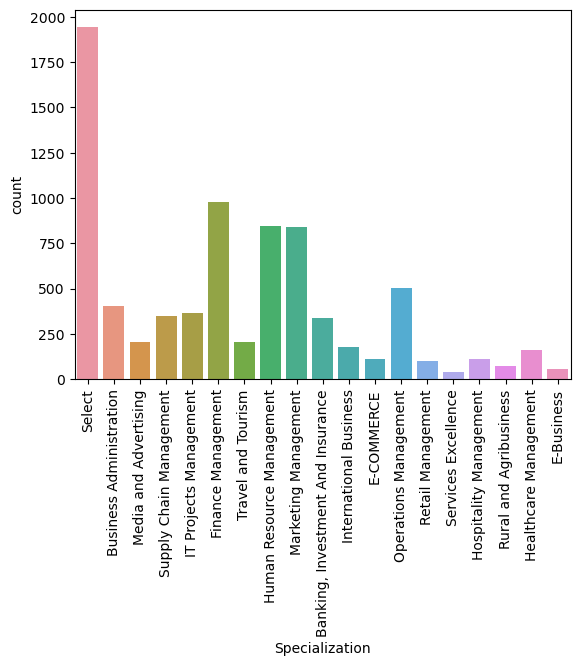

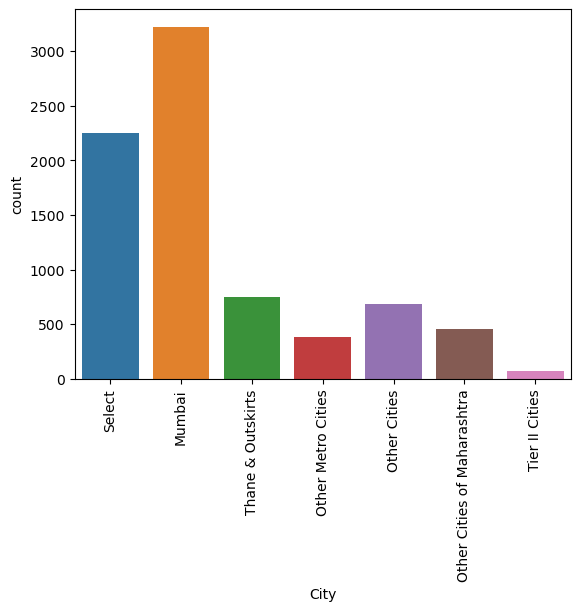

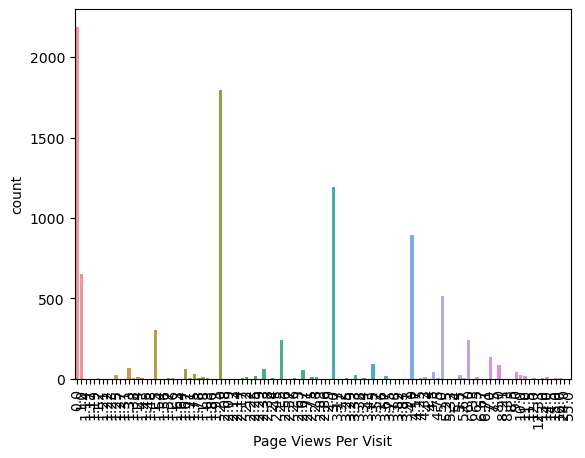

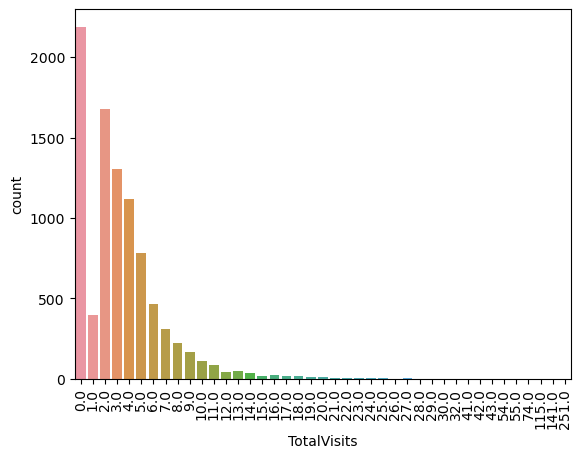

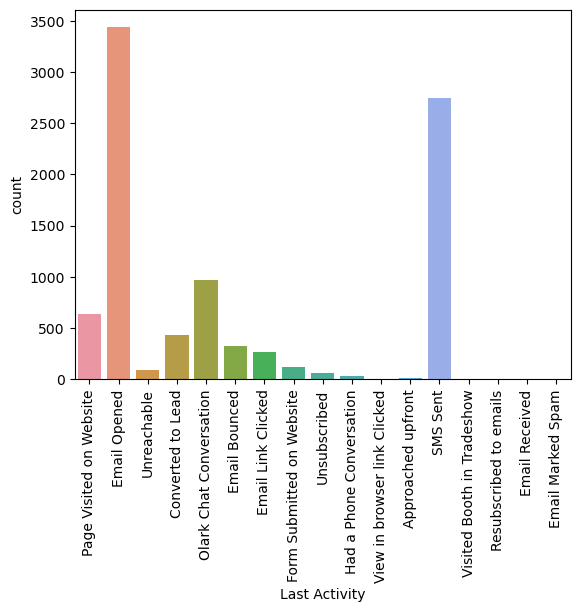

In [11]:
missing_cols=['Specialization','City','Page Views Per Visit','TotalVisits','Last Activity']

for i in missing_cols:
    sns.countplot(x=i, data = df)
    plt.xticks(rotation=90)
    plt.show()

#### From above we can see that we can also drop specialization and city column
#### as these have 15 percent of missing value and large number of select means select is also no information provided


In [12]:
#droppind specialization and City as having select and large missing
df.drop(['Specialization','City'],axis=1,inplace=True)

In [13]:
#columns of the dataframe
cols=df.columns
cols

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Now lets check the unique value count of each of the column**

In [14]:
#Checking the unique value
for i in cols:
    print("Column Name:",i)
    print('+'*5)
    print('unique_value',df[i].nunique())
    print('+'*5)
    print("Value Count:\n",df[i].value_counts())
    print('*'*50)

Column Name: Prospect ID
+++++
unique_value 9240
+++++
Value Count:
 7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
**************************************************
Column Name: Lead Number
+++++
unique_value 9240
+++++
Value Count:
 660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
**************************************************
Column Name: Lead Origin
+++++
unique_value 5
+++++
Value Count:
 Landing 

### From above we can conclude that we can drop the following column
- Prospect ID and Lead Number as these all have the unique identifier 

**Below column to be dropped as 99 to 100 % data is one sided these have only two unique vales so these will not add contribution while learnig the machine**
- Do Not Email, Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque




In [15]:
#List of the unwanted column
cols_drop=['Prospect ID','Lead Number','Do Not Email', 'Do Not Call','Search','Magazine',
           'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque']

In [16]:
#Dropping the unwanted column
df=df.drop(cols_drop,axis=1)

In [17]:
#checking shape of the dataframe
df.shape

(9240, 9)

In [18]:
#checking the null value
df.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

**No there are only few value of missing so I will drop the rows having the missing value**

In [19]:
#dropping the row of the null values
df_cleaned=df.dropna()

In [20]:
#Confirming the null value again
df_cleaned.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [21]:
#checking shape of the dataframe
df_cleaned.shape

(9074, 9)

In [22]:
#checking head of the dataframe
df_cleaned.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


**Lets check if there is any null of select in the data**

In [23]:
#Sality check of the null and Select value
(df_cleaned=='Select').sum()+df_cleaned.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [24]:
#checking info of the data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   A free copy of Mastering The Interview  9074 non-null   object 
 8   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 708.9+ KB


# 4. EDA Univariate and Bivariate analysis

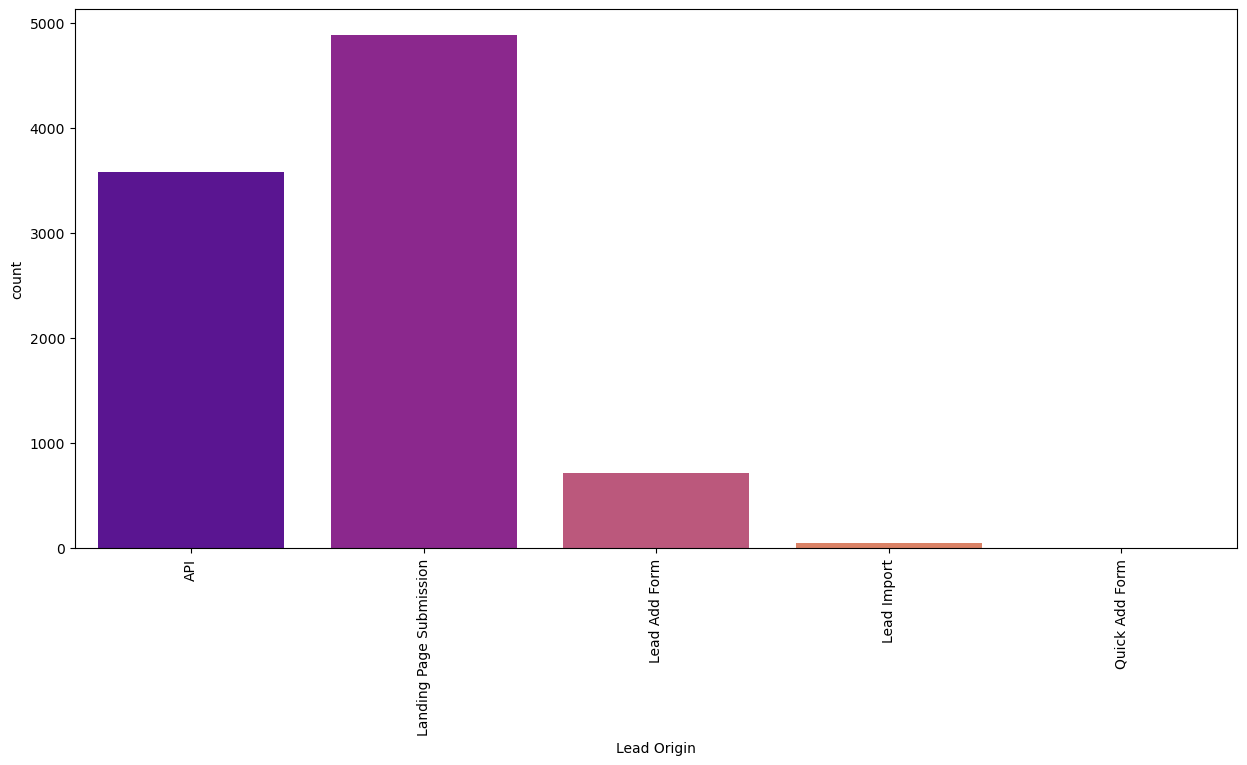

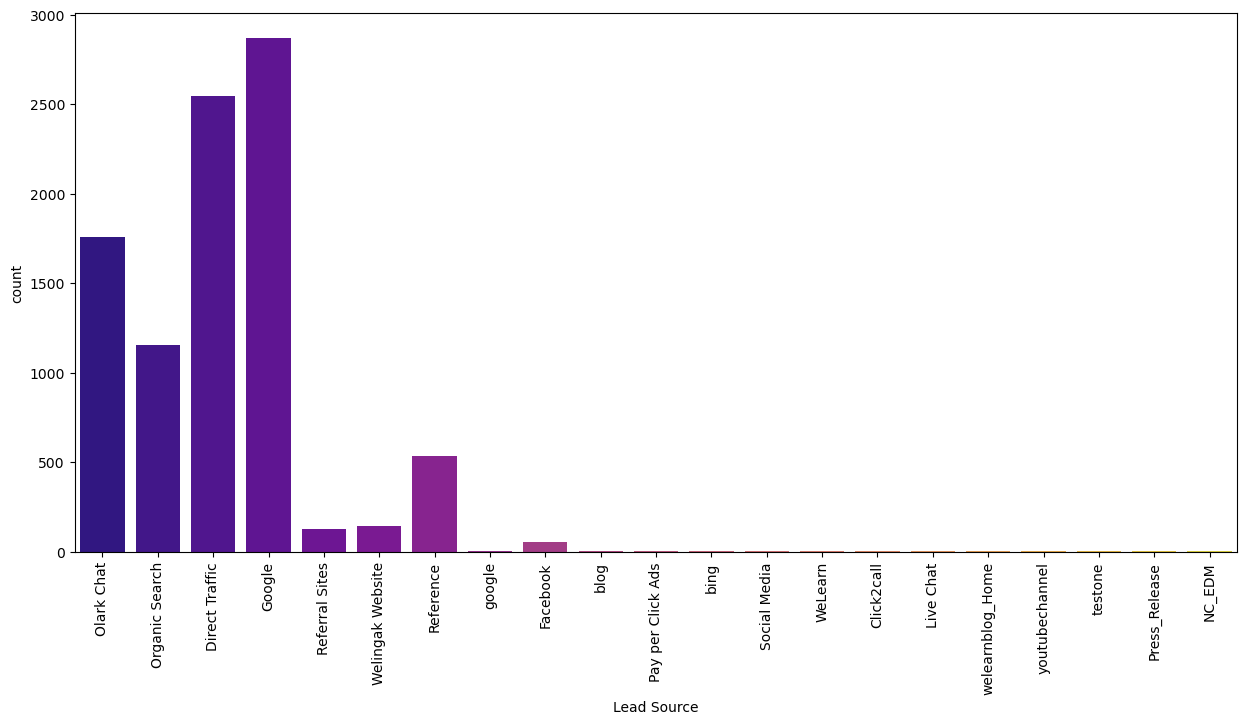

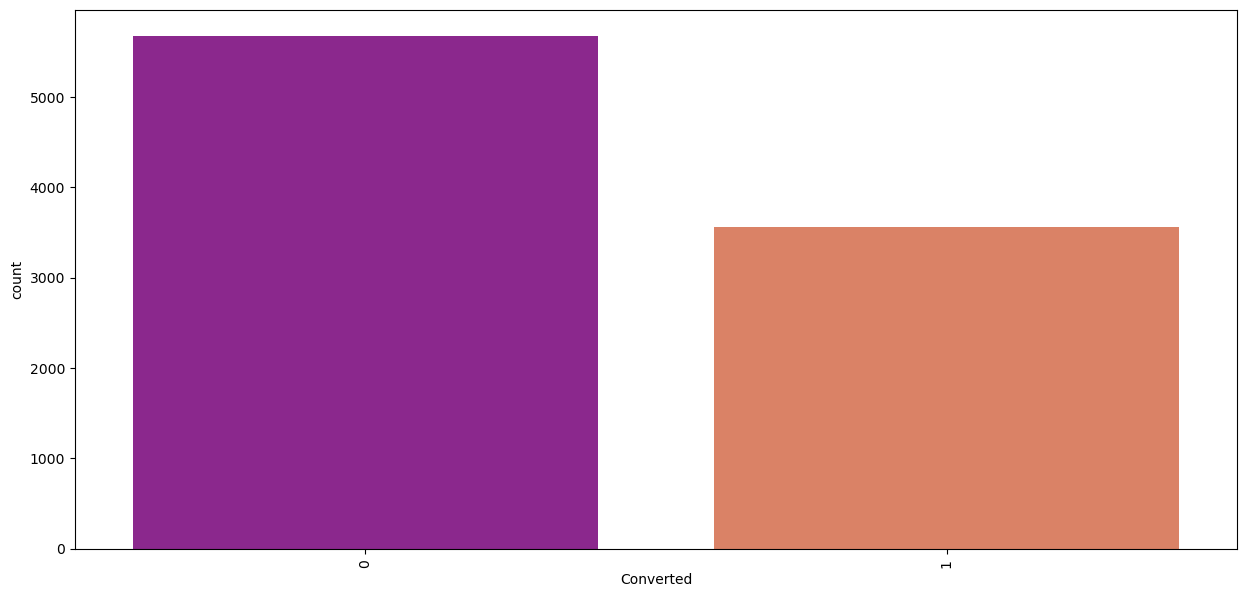

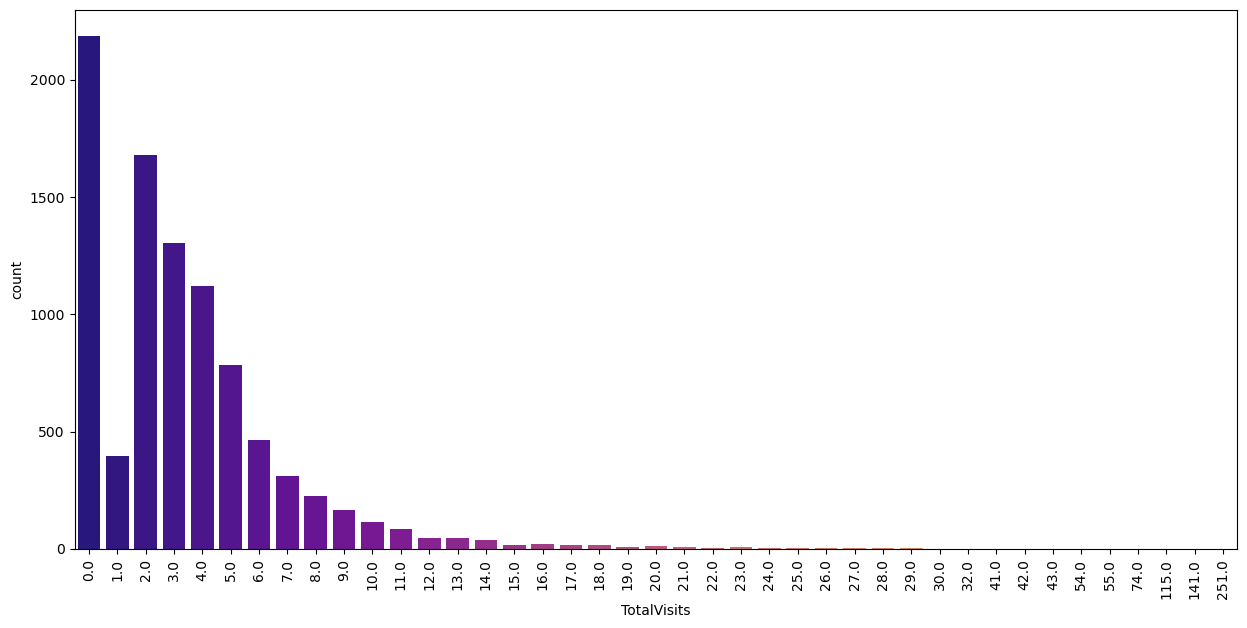

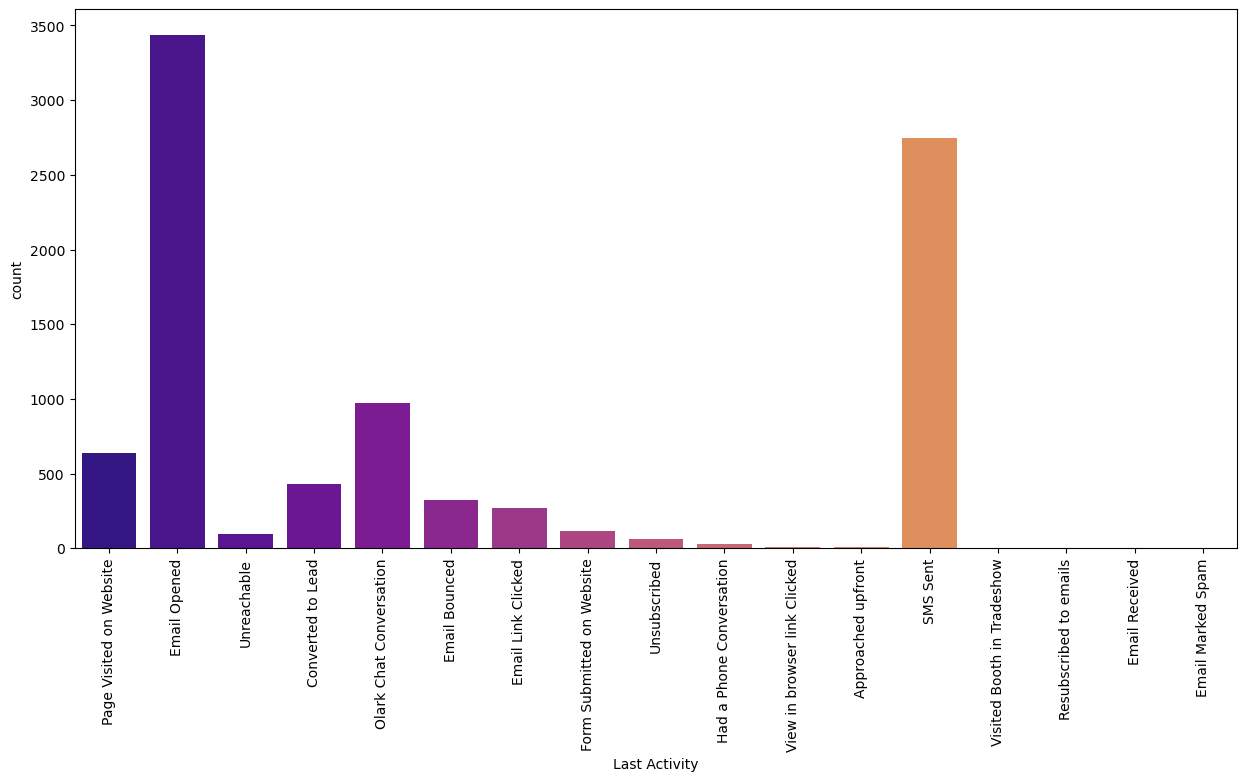

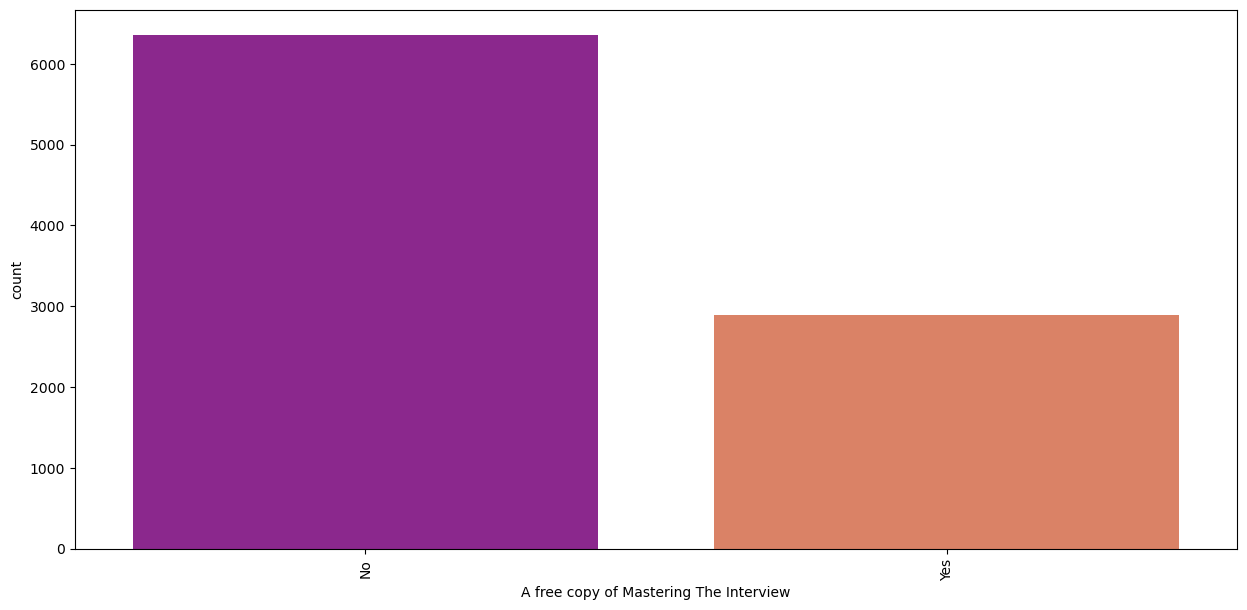

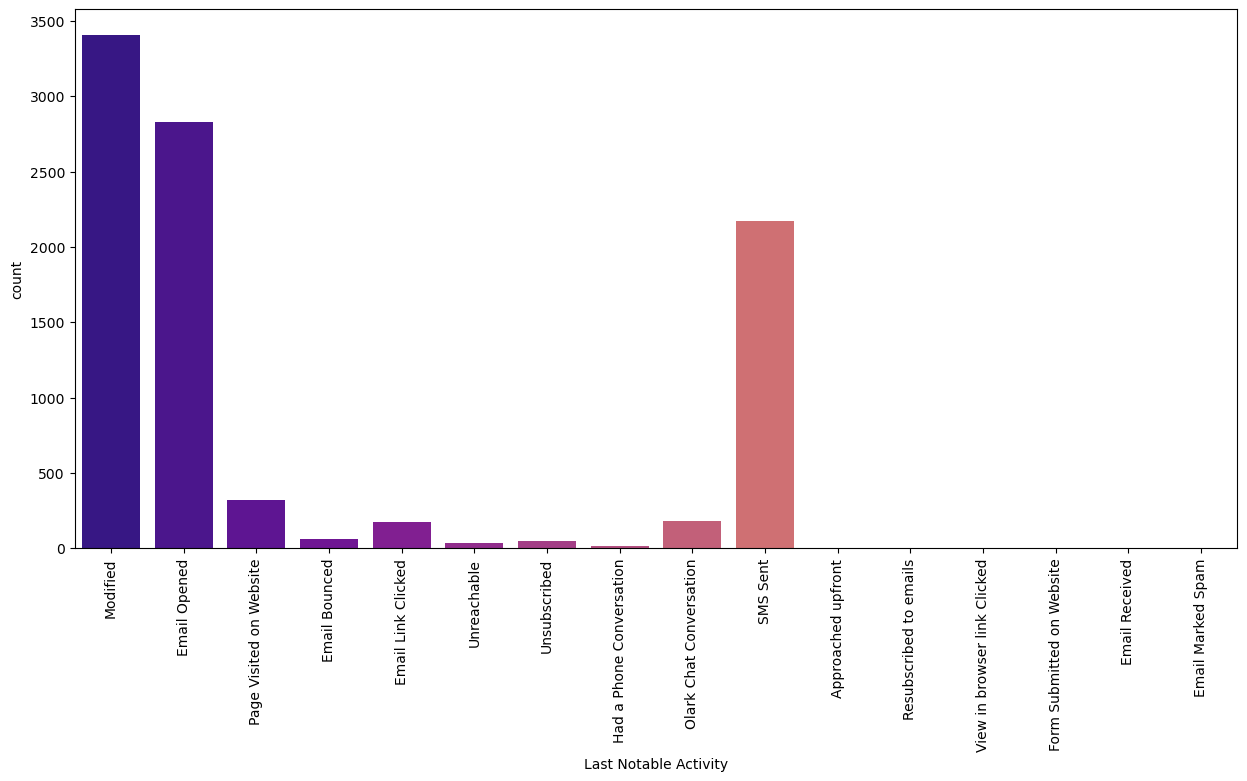

In [25]:
## plotting countplots for the categorical variables

def count_plot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
cols = ['Lead Origin','Lead Source','Converted','TotalVisits','Last Activity',
       'A free copy of Mastering The Interview','Last Notable Activity']
for col in cols:
    count_plot(col)

### Outliers treatment

<AxesSubplot:xlabel='Page Views Per Visit'>

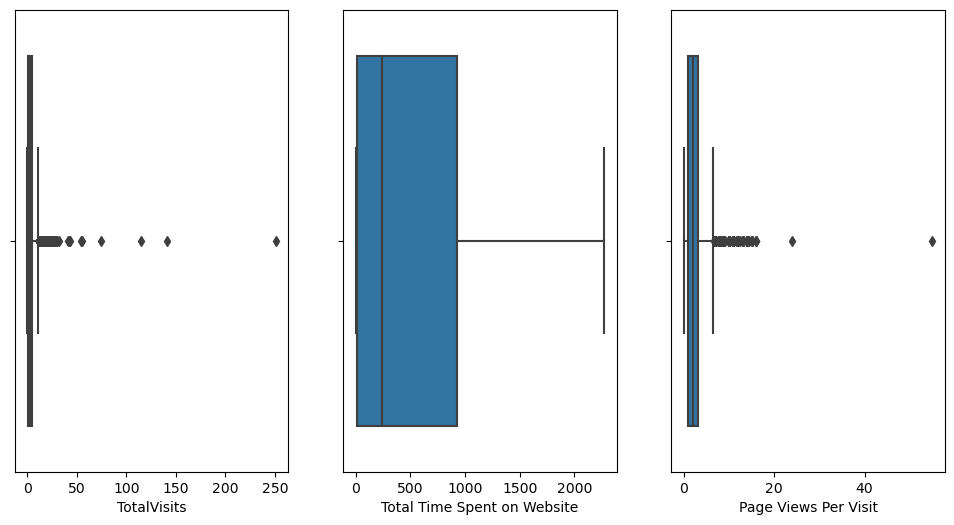

In [26]:
#chcking outliers by using the boxplot
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(df_cleaned['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(df_cleaned['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(df_cleaned['Page Views Per Visit'])

**We have ro remove outliers from the Total visit and Page per visit column**

In [27]:
#removing the outliers manually with the help of box plot
df_cleaned=df_cleaned[df_cleaned['TotalVisits']<30]
df_cleaned=df_cleaned[df_cleaned['Page Views Per Visit']<20]

In [28]:
#checking shape of the data after removing the outliers
df_cleaned.shape

(9062, 9)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

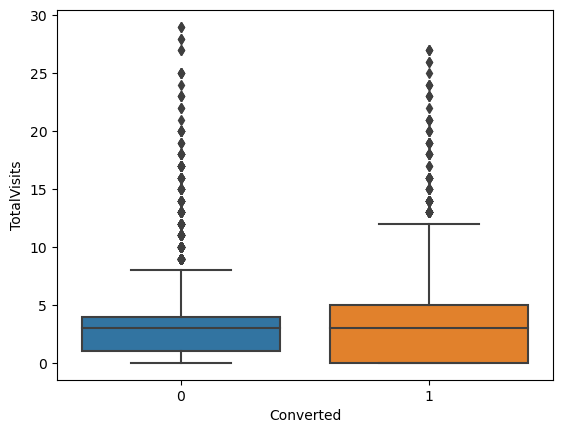

In [29]:
#checking realtion vs total visit using the boxplot
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = df_cleaned)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

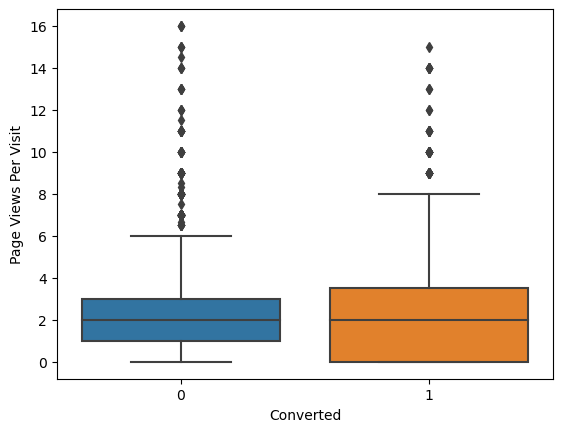

In [30]:
#checking converted vs Page views per visit using the box plot
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = df_cleaned)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

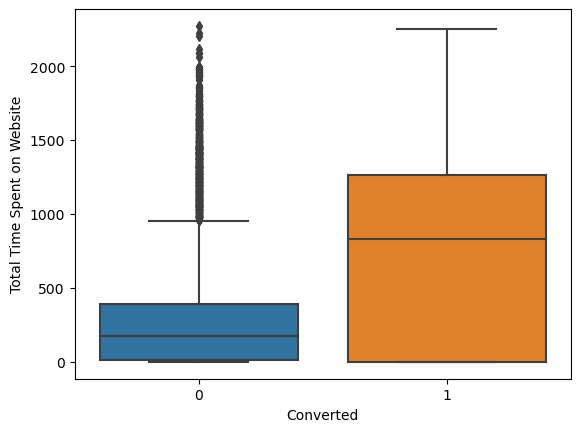

In [31]:
#checking the Converted vs Total time spent on website using the box plot
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = df_cleaned)

**Here from the graph we can see that those who has visited number of the site more time has been converted to as successful lead**

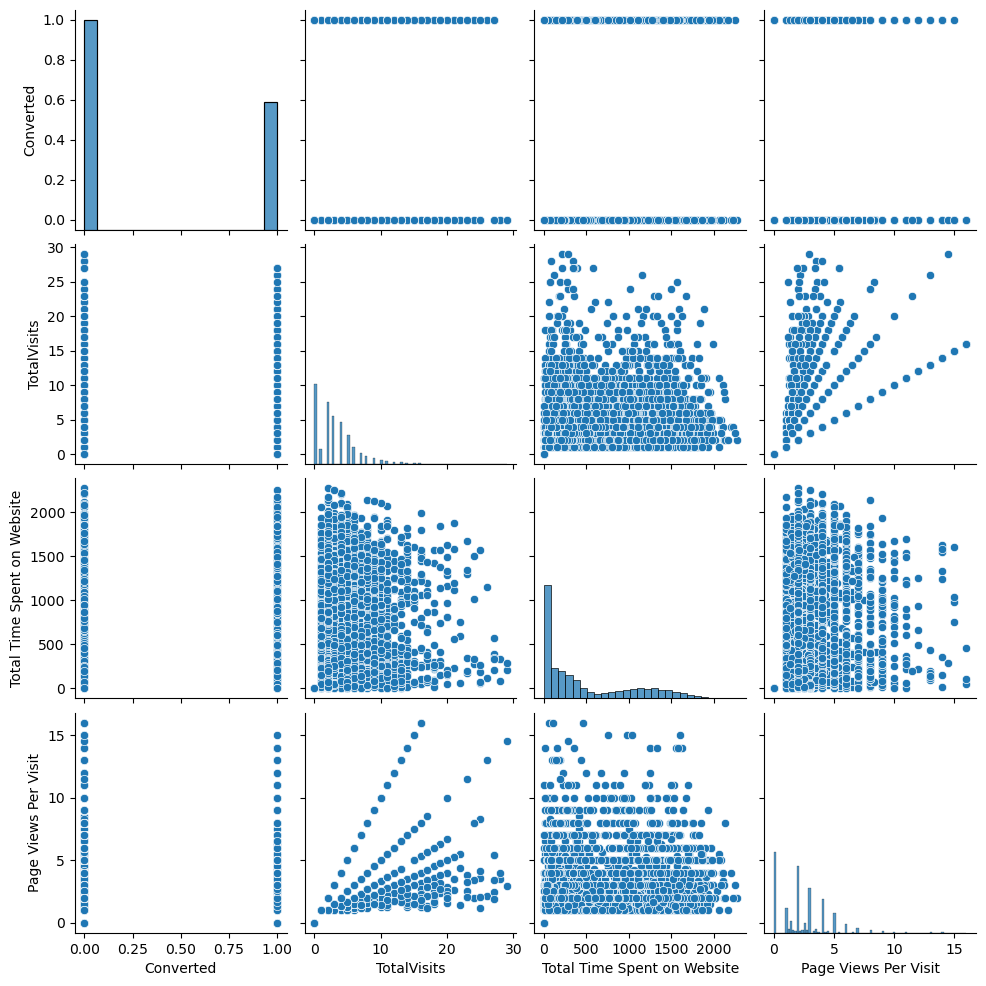

In [32]:
#checking the pait plot 
sns.pairplot(df_cleaned)

#### Checking correlation

<AxesSubplot:>

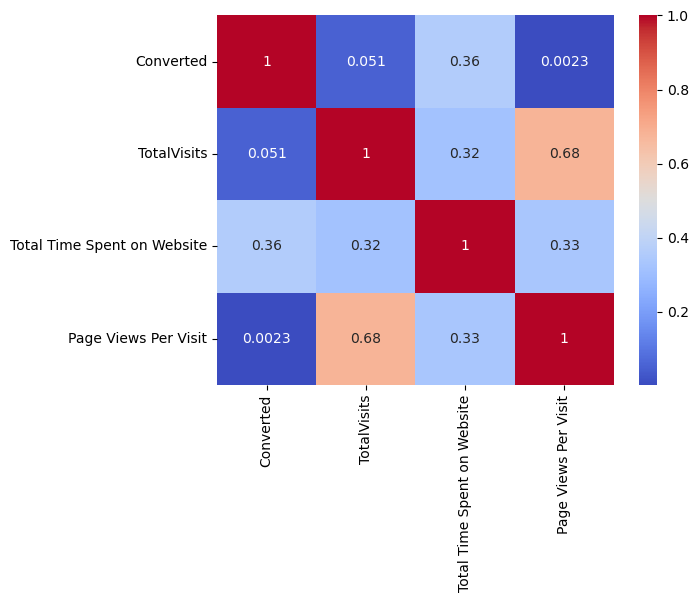

In [33]:
#corelation of numerical column using heatmap
sns.heatmap(df_cleaned.corr(),annot=True,cmap='coolwarm')

**We can see that total visit and page per visit has high correlation and infact that is true because as the number of times person will visit the site his time spent and number of the visit will increase**

In [34]:
#checking columns
df_cleaned.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
#seprating numriacal and categorical variables
catvars = df_cleaned.select_dtypes(include=['object']).columns
numvars = df_cleaned.select_dtypes(include = ['int32','int64','float32','float64']).columns


In [36]:
#checking sum 
len(catvars)+len(numvars)

9

In [37]:
#numerial and categorical variable
catvars,numvars

(Index(['Lead Origin', 'Lead Source', 'Last Activity',
        'A free copy of Mastering The Interview', 'Last Notable Activity'],
       dtype='object'),
 Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
        'Page Views Per Visit'],
       dtype='object'))

In [38]:
#checking the unique value
for i in catvars:
    print("Column Name:",i)
    print('+'*5)
    print('unique_value',df[i].nunique())
    print('+'*5)
    print("Value Count:\n",df[i].value_counts())
    print('*'*50)

Column Name: Lead Origin
+++++
unique_value 5
+++++
Value Count:
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************************************************
Column Name: Lead Source
+++++
unique_value 21
+++++
Value Count:
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
**********************************************

# 5. Preparing data for modelling

**We will reduce the categeory where the value count is very less and not usefull for us**

In [39]:
# converting small number of the category to other categeory
def setcolumn(text,value,col_name):
 
    if text in value:
        return text
    else:
        return 'other_'+ col_name
        
    


In [40]:
#Applying the above function to the relevant categorical column
lead_source= ['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website',
             'Referral Sites','Facebook']
col_name='LeadSource'
df_cleaned['Lead Source'] = df_cleaned['Lead Source'].apply(lambda x:setcolumn(x,lead_source,col_name))

In [41]:
#value count of the lead source column
df_cleaned['Lead Source'].value_counts()

Google              2867
Direct Traffic      2535
Olark Chat          1753
Organic Search      1153
Reference            443
Welingak Website     129
Referral Sites       123
Facebook              31
other_LeadSource      28
Name: Lead Source, dtype: int64

In [42]:
#Applying the function to the Last activity column
last_activity= ['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website',
               'Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website',
               'Unreachable','Unsubscribed','Had a Phone Conversation']
col_name='LastActivity'
df_cleaned['Last Activity'] = df_cleaned['Last Activity'].apply(lambda x:setcolumn(x,last_activity,col_name))

In [43]:
#value count of the Last activity column
df_cleaned['Last Activity'].value_counts()

Email Opened                 3430
SMS Sent                     2714
Olark Chat Conversation       972
Page Visited on Website       632
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Had a Phone Conversation       25
other_LastActivity             17
Name: Last Activity, dtype: int64

In [44]:
#Applying the function to the Last Notable activity column
last_notable_activity= ['Modified','Email Opened','SMS Sent','Page Visited on Website', 
                'Olark Chat Conversation','Email Link Clicked','Email Bounced',
                'Unsubscribed','Unreachable','Had a Phone Conversation' ] 
col_name='Last Notable Activity'
df_cleaned['Last Notable Activity'] = df_cleaned['Last Notable Activity'].apply(lambda x:setcolumn(x,last_notable_activity,col_name))

In [45]:
#Value count of Last activity column
df_cleaned['Last Notable Activity'].value_counts()

Modified                       3263
Email Opened                   2821
SMS Sent                       2151
Page Visited on Website         313
Olark Chat Conversation         183
Email Link Clicked              173
Email Bounced                    60
Unsubscribed                     45
Unreachable                      32
Had a Phone Conversation         14
other_Last Notable Activity       7
Name: Last Notable Activity, dtype: int64

In [46]:
#Checking first 5 rows
df_cleaned.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


**We will map A free Matering copy column to 0 and 1**

In [47]:
#Mapping A free copy of Mastering The Interview column to 0 and 1
df_cleaned['A free copy of Mastering The Interview']=df_cleaned['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})

In [48]:
df_cleaned['A free copy of Mastering The Interview'].value_counts()

0    6178
1    2884
Name: A free copy of Mastering The Interview, dtype: int64

In [49]:
#checking info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9062 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9062 non-null   object 
 1   Lead Source                             9062 non-null   object 
 2   Converted                               9062 non-null   int64  
 3   TotalVisits                             9062 non-null   float64
 4   Total Time Spent on Website             9062 non-null   int64  
 5   Page Views Per Visit                    9062 non-null   float64
 6   Last Activity                           9062 non-null   object 
 7   A free copy of Mastering The Interview  9062 non-null   int64  
 8   Last Notable Activity                   9062 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 966.0+ KB


### Creating dummy variable

In [50]:
#Creating dummy of the categorical variable
dummy1 = pd.get_dummies(df_cleaned[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

In [51]:
# Adding the results to the master dataframe
df_cleaned = pd.concat([df_cleaned, dummy1], axis=1)


In [52]:
#Dropping column already created to dummy.
df_cleaned=df_cleaned.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'],axis=1)

In [53]:
#Checking shape of the data
df_cleaned.shape

(9062, 37)

In [54]:
#checking first 5 row of the data
df_cleaned.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_LeadSource,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_other_LastActivity,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_other_Last Notable Activity
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Splitting the data set in train and test

In [55]:
# Seprating the target variable to other features
X=df_cleaned.drop('Converted',axis=1)
y=df_cleaned['Converted']


In [56]:
#split the data in trainn and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Checkin the shape of the train and test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7249, 36), (1813, 36), (7249,), (1813,))

### Applying standard scaler to the train dataset

In [58]:
#Applying standard scaler to the numerical column
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [59]:
#Applying scaler value to the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [60]:
#checking first 5 row of the train dataset
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_LeadSource,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_other_LastActivity,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_other_Last Notable Activity
433,-0.403608,-0.156434,-0.170880,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3132,0.187155,1.382529,0.796780,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8475,-0.994371,-0.886479,-1.138541,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6068,1.664063,-0.477434,3.215931,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7581,-0.108226,-0.112411,0.312950,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# 6. Model Building


1. Building first model using all variable

In [61]:
#adding constant and appling the stats model on full dataframe
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7249
Model:                            GLM   Df Residuals:                     7212
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3183.3
Date:                Tue, 18 Oct 2022   Deviance:                       6366.7
Time:                        09:02:31   Pearson chi2:                 7.47e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3616
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.1510      0.656     -1.754      0.079      -2.437       0.135
TotalVisits                                           0.2826      0.044      6.389      0.000       0.196       0.369
Total Time Spent on Website                           1.1517      0.037     31.078      0.000       1.079       1.224
Page Views Per Visit                                 -0.1762      0.048     -3.653      0.000      -0.271      -0.082
A free copy of Mastering The Interview               -0.0094      0.096     -0.099      0.921      -0.197       0.178
Lead Origin_Landing Page Submission                  -0.1857      0.097     -1.918      0.055      -0.376       0.004
Lead Origin_Lead Add Form                             1.9710      1.026      1.921      0.055      -0.040       3.982
Lead Origin_Lead Import                              21.8519   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                                -20.3182   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google                                    0.3300      0.102      3.221      0.001       0.129       0.531
Lead Source_Olark Chat                                1.3297      0.145      9.161      0.000       1.045       1.614
Lead Source_Organic Search                            0.1340      0.115      1.162      0.245      -0.092       0.360
Lead Source_Reference                                 2.3448      1.048      2.238      0.025       0.291       4.398
Lead Source_Referral Sites                            0.1215      0.289      0.420      0.675      -0.446       0.689
Lead Source_Welingak Website                          4.5029      1.442      3.124      0.002       1.677       7.328
Lead Source_other_LeadSource                          0.3099      0.622      0.498      0.618      -0.909       1.529
Last Activity_Email Bounced                          -1.3254      0.439     -3.021      0.003      -2.185      -0.465
Last Activity_Email Link Clicked                      0.5359      0.362      1.481      0.138      -0.173       1.245
Last Activity_Email Opened                            0.9256      0.219      4.226      0.000       0.496       1.355
Last Activity_Form Submitted on Website               0.3274      0.347      0.944      0.345      -0.352       1.007
Last Activity_Had a Phone Conversation                2.0809      0.845      2.462      0.014       0.424       3.737
Last Activity_Olark Chat Conversation                -0.6673      0.248     -2.686      0.007      -1.154      -0.180
Last Activity_Page Visited on Website                -0.0614      0.276     -0.223      0.824      -0.602       0.479
Last Activity_S

**Above model we can see there are many features that have p value very high one of the way w ca start eliminating the features and keep checking the p value and VIF but we will build the model with the feature selection taking the 15 feature then eliminate itusing p and vif**

# 7. Feature selection using RFE

In [62]:
#Instanciating the logistic regression model
logreg = LogisticRegression()

In [63]:
#Feature selection using the RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [64]:
#Features supporting the RFE
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False])

In [65]:
#List of the column along with the RFE support and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_other_LeadSource', False, 22),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sen

In [66]:
# creating column variable supporting RFE
col = X_train.columns[rfe.support_]

In [67]:
#Applying same column to the RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_other_LeadSource',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_other_Last Notable Activity'],
      dtype='object')

### Accessing the model with the stats model

In [68]:
# Mapping X_train_rfe to rfe supports column
X_train_rfe = X_train[col]

In [69]:
#Applying stat model and checcking summary
X_train_1 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_1, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7249
Model:                            GLM   Df Residuals:                     7233
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3231.0
Date:                Tue, 18 Oct 2022   Deviance:                       6462.0
Time:                        09:02:32   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3532
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9092      0.086    -22.161      0.000      -2.078      -1.740
Total Time Spent on Website                        1.1612      0.037     31.703      0.000       1.089       1.233
Lead Origin_Lead Add Form                          2.1558      0.884      2.440      0.015       0.424       3.887
Lead Origin_Lead Import                            1.4113      0.442      3.190      0.001       0.544       2.278
Lead Source_Olark Chat                             1.2341      0.093     13.291      0.000       1.052       1.416
Lead Source_Reference                              2.0520      0.906      2.265      0.023       0.277       3.827
Lead Source_Welingak Website                       4.2838      1.345      3.186      0.001       1.648       6.919
Last Activity_Email Bounced                       -1.3713      0.309     -4.441      0.000      -1.977      -0.766
Last Activity_Email Opened                         0.7513      0.096      7.862      0.000       0.564       0.939
Last Activity_Had a Phone Conversation             1.8421      0.820      2.248      0.025       0.236       3.448
Last Activity_Olark Chat Conversation             -0.8693      0.165     -5.282      0.000      -1.192      -0.547
Last Activity_SMS Sent                             0.8127      0.144      5.632      0.000       0.530       1.096
Last Activity_other_LastActivity                   2.1651      0.647      3.345      0.001       0.897       3.434
Last Notable Activity_Had a Phone Conversation     1.9169      1.382      1.387      0.165      -0.791       4.625
Last Notable Activity_SMS Sent                     1.3239      0.132     10.003      0.000       1.064       1.583
Last Notable Activity_Unreachable                  2.5537      0.450      5.676      0.000       1.672       3.436
==================================================================================================================
"""

Dropping the 'Last Notable Activity_Had a Phone Conversation' due to high p value

In [70]:
#Dropping column Last Notable Activity_Had a Phone Conversation
X_train_rfe=X_train_rfe.drop('Last Notable Activity_Had a Phone Conversation',axis=1)

In [71]:
#Applying new stat model after dropping above column and checking summary
X_train_3 = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7249
Model:                            GLM   Df Residuals:                     7234
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3232.1
Date:                Tue, 18 Oct 2022   Deviance:                       6464.1
Time:                        09:02:32   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3530
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9089      0.086    -22.161      0.000      -2.078      -1.740
Total Time Spent on Website                1.1607      0.037     31.700      0.000       1.089       1.233
Lead Origin_Lead Add Form                  2.1555      0.883      2.440      0.015       0.424       3.887
Lead Origin_Lead Import                    1.4106      0.442      3.188      0.001       0.544       2.278
Lead Source_Olark Chat                     1.2335      0.093     13.287      0.000       1.052       1.415
Lead Source_Reference                      2.0507      0.906      2.264      0.024       0.276       3.826
Lead Source_Welingak Website               4.2835      1.345      3.186      0.001       1.648       6.919
Last Activity_Email Bounced               -1.3713      0.309     -4.441      0.000      -1.976      -0.766
Last Activity_Email Opened                 0.7513      0.096      7.862      0.000       0.564       0.939
Last Activity_Had a Phone Conversation     2.6856      0.632      4.247      0.000       1.446       3.925
Last Activity_Olark Chat Conversation     -0.8694      0.165     -5.283      0.000      -1.192      -0.547
Last Activity_SMS Sent                     0.8127      0.144      5.632      0.000       0.530       1.095
Last Activity_other_LastActivity           2.1649      0.647      3.345      0.001       0.896       3.433
Last Notable Activity_SMS Sent             1.3237      0.132     10.003      0.000       1.064       1.583
Last Notable Activity_Unreachable          2.5533      0.450      5.675      0.000       1.672       3.435
==========================================================================================================
"""

In [72]:
# Creating function for calculating VIF for the model

def vif_cal(data):
    vif = pd.DataFrame()
    X = data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [73]:
#checking VIF calling above function
vif_cal(X_train_rfe)

,Features,VIF
1,Lead Origin_Lead Add Form,57.07
4,Lead Source_Reference,44.73
5,Lead Source_Welingak Website,13.41
10,Last Activity_SMS Sent,4.98
12,Last Notable Activity_SMS Sent,4.89
3,Lead Source_Olark Chat,1.78
9,Last Activity_Olark Chat Conversation,1.40
0,Total Time Spent on Website,1.29
7,Last Activity_Email Opened,1.16
2,Lead Origin_Lead Import,1.01


**Dropping column "Lead Origin_Lead Add Form" due to high vif**

In [74]:
#Dropping the Lead Origin_Lead Add Form due to high VIF
X_train_rfe=X_train_rfe.drop('Lead Origin_Lead Add Form',axis=1)

In [75]:
#Applying stats model after dropping above column and checking summary
X_train_4 = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7249
Model:                            GLM   Df Residuals:                     7235
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3235.5
Date:                Tue, 18 Oct 2022   Deviance:                       6471.0
Time:                        09:02:33   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3524
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9034      0.086    -22.140      0.000      -2.072      -1.735
Total Time Spent on Website                1.1588      0.037     31.691      0.000       1.087       1.230
Lead Origin_Lead Import                    1.4052      0.442      3.176      0.001       0.538       2.272
Lead Source_Olark Chat                     1.2315      0.093     13.284      0.000       1.050       1.413
Lead Source_Reference                      4.2006      0.210     19.961      0.000       3.788       4.613
Lead Source_Welingak Website               6.4339      1.016      6.334      0.000       4.443       8.425
Last Activity_Email Bounced               -1.3753      0.309     -4.456      0.000      -1.980      -0.770
Last Activity_Email Opened                 0.7503      0.095      7.864      0.000       0.563       0.937
Last Activity_Had a Phone Conversation     2.6804      0.632      4.240      0.000       1.441       3.919
Last Activity_Olark Chat Conversation     -0.8738      0.164     -5.314      0.000      -1.196      -0.552
Last Activity_SMS Sent                     0.8082      0.144      5.606      0.000       0.526       1.091
Last Activity_other_LastActivity           2.1596      0.647      3.338      0.001       0.892       3.427
Last Notable Activity_SMS Sent             1.3266      0.132     10.029      0.000       1.067       1.586
Last Notable Activity_Unreachable          2.5476      0.450      5.664      0.000       1.666       3.429
==========================================================================================================
"""

In [76]:
vif_cal(X_train_rfe)

,Features,VIF
9,Last Activity_SMS Sent,4.98
11,Last Notable Activity_SMS Sent,4.89
2,Lead Source_Olark Chat,1.78
8,Last Activity_Olark Chat Conversation,1.40
0,Total Time Spent on Website,1.29
6,Last Activity_Email Opened,1.16
3,Lead Source_Reference,1.15
4,Lead Source_Welingak Website,1.05
1,Lead Origin_Lead Import,1.01
5,Last Activity_Email Bounced,1.01


**Now our model looks good as P value are close to 0 and VIF is less the 5 so we will keep this model as final model**

In [77]:
#Predicting value of the train dataset
y_train_pred = res.predict(X_train_4).values

In [78]:
#predicted valie of the train dataset
y_train_pred

array([0.20842825, 0.86216292, 0.27910253, ..., 0.11923276, 0.18590579,
       0.46633429])

In [79]:
#reshaping in 2d array
y_train_pred=y_train_pred.reshape(-1)

In [80]:
#checking value
y_train_pred[:10]

array([0.20842825, 0.86216292, 0.27910253, 0.07895269, 0.032016  ,
       0.48046071, 0.25807814, 0.01554019, 0.50754022, 0.81973346])

##### Creating a dataframe with the actual converted and the predicted probabilities

In [81]:
# Creating the dataframe with actual converted value and predicted value 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Conv_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,Conv_ID
0,0,0.208428,433
1,1,0.862163,3132
2,1,0.279103,8475
3,0,0.078953,6068
4,0,0.032016,7581


# 8. Evaluation of the Final model

In [82]:
#Mapping the predicted value with the default value 0.5, Means greater than 0.5 as 1 and less than 0.5 as 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [83]:
y_train_pred_final

,Converted,Conv_Prob,Conv_ID,Predicted
0,0,0.208428,433,0
1,1,0.862163,3132,1
2,1,0.279103,8475,0
3,0,0.078953,6068,0
4,0,0.032016,7581,0
...,...,...,...,...
7244,0,0.146849,5859,0
7245,0,0.831957,5306,1
7246,0,0.119233,5507,0
7247,0,0.185906,897,0


In [84]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3938  564]
 [ 927 1820]]


In [85]:
# Checking Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7943164574424059


# 9. Checking Other accuracy beyond the simple accuracy

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Sensitivity of model train dataset
TP / float(TP+FN)

0.6625409537677467

In [88]:
# Specificity of model train dataset
TN / float(TN+FP)

0.8747223456241671

In [89]:
# False positive rate - of model train dataset
print(FP/ float(TN+FP))

0.12527765437583296


In [90]:
# positive predictive value 
print (TP / float(TP+FP))

0.7634228187919463


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8094552929085304


# 10. Plotting the ROC Curve

In [92]:
#Creating function for plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

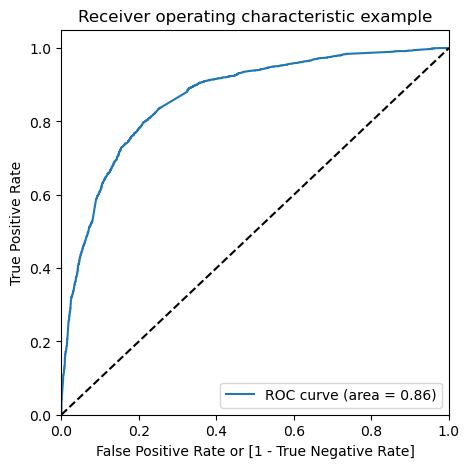

In [93]:
#Plotting the ROC curve calling above function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

# 11. Finding the Optimal Cutoff

In [94]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Conv_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.208428,433,0,1,1,1,0,0,0,0,0,0,0
1,1,0.862163,3132,1,1,1,1,1,1,1,1,1,1,0
2,1,0.279103,8475,0,1,1,1,0,0,0,0,0,0,0
3,0,0.078953,6068,0,1,0,0,0,0,0,0,0,0,0
4,0,0.032016,7581,0,1,0,0,0,0,0,0,0,0,0


In [95]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378949  1.000000  0.000000
0.1   0.1  0.568078  0.973426  0.320746
0.2   0.2  0.729066  0.912996  0.616837
0.3   0.3  0.782729  0.824536  0.757219
0.4   0.4  0.796248  0.751365  0.823634
0.5   0.5  0.794316  0.662541  0.874722
0.6   0.6  0.788109  0.589734  0.909151
0.7   0.7  0.757622  0.447397  0.946912
0.8   0.8  0.731963  0.346560  0.967126
0.9   0.9  0.679956  0.175464  0.987783


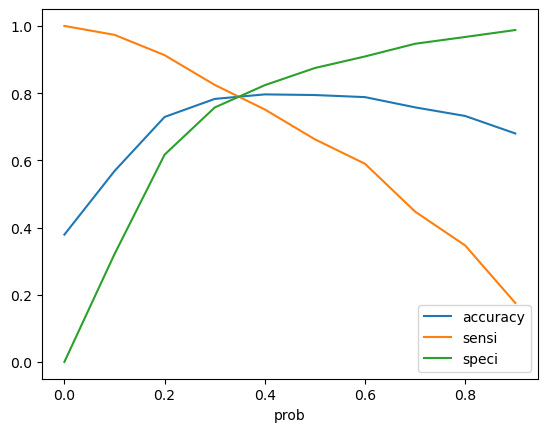

In [96]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [97]:
#Mapping the predicted Prob as per the new cut off 0.35.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,Conv_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.208428,433,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.862163,3132,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.279103,8475,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.078953,6068,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.032016,7581,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
# Overall accuracy of model train dataset
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7914195061387778

In [99]:
#Confussion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3558,  944],
       [ 568, 2179]])

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.79322897706589

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.7903154153709463

In [103]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20968458462905376


In [104]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6977265449887928


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8623364032961707


# 12. Calculating Precesion and Recall

In [106]:
#importing library for precision and recall score
from sklearn.metrics import precision_score, recall_score

In [107]:
# checking the precesion score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6977265449887928

In [108]:
# checking the recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.79322897706589

# 13. Making Prediction on the test set

In [109]:
# Final column used for the model building
col=X_train_rfe.columns

In [110]:
#creating test set with the same columns
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_LastActivity,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
5254,-0.343531,0,0,0,0,0,1,0,0,0,0,0,0
1787,-0.827782,0,0,0,0,1,0,0,0,0,0,0,0
4509,0.228765,0,0,0,0,1,0,0,0,0,0,0,0
5654,-0.886479,0,1,0,0,0,0,0,1,0,0,0,0
4615,1.241289,0,0,0,0,0,1,0,0,0,0,0,0


In [111]:
#Adding constant to the test dataset
X_test_sm = sm.add_constant(X_test)

In [112]:
#Prediction of the test dataset
y_test_pred = res.predict(X_test_sm)

In [113]:
#checking values
y_test_pred[:10]

5254    0.174909
1787    0.014232
4509    0.046814
5654    0.070894
4615    0.570827
4134    0.554625
465     0.192426
8361    0.861403
3616    0.498507
3258    0.154571
dtype: float64

In [114]:
#creating dataframe with the prediction values
y_test_pred_1 = pd.DataFrame(y_test_pred,columns=["Conv_prob"])

In [115]:
#checking head of the created dataframe
y_test_pred_1.head()

,Conv_prob
5254,0.174909
1787,0.014232
4509,0.046814
5654,0.070894
4615,0.570827


In [116]:
#creating new dataframe mapping value as per the cutoff value 0.35
y_test_pred_1['Final_prediction']=y_test_pred_1['Conv_prob'].map(lambda x: 1 if x > 0.35 else 0)

In [117]:
#Adding lead score column with the converted value
y_test_pred_1['LeadScore']=round((y_test_pred_1['Conv_prob']*100),2)
y_test_pred_1.sample(10)

,Conv_prob,Final_prediction,LeadScore
5949,0.370467,1,37.05
1048,0.111617,0,11.16
1980,0.163557,0,16.36
895,0.260126,0,26.01
8852,0.102499,0,10.25
4609,0.279103,0,27.91
8558,0.075026,0,7.50
3133,0.070894,0,7.09
5449,0.477268,1,47.73
3194,0.882904,1,88.29


### Accuracy test data

In [118]:
# Overall accuracy of test data
metrics.accuracy_score(y_test, y_test_pred_1.Final_prediction)

0.7837837837837838

### Confusion Matrix

In [119]:
#Confussion Matrix of test data
conf_testset = metrics.confusion_matrix(y_test, y_test_pred_1.Final_prediction )
conf_testset

array([[890, 237],
       [155, 531]])

In [120]:
TP = conf_testset[1,1] # true positive 
TN = conf_testset[0,0] # true negatives
FP = conf_testset[0,1] # false positives
FN = conf_testset[1,0] # false negatives

### Sensitivity of test set

In [121]:
# Sensitivity of the test set
TP / float(TP+FN)

0.7740524781341108

### Sepcificity of test set

In [122]:
# Specificity for the test set
TN / float(TN+FP)

0.7897071872227152

# 14.Final Conclusion

- Final Model (res) res = logm4.fit()
- Can be converted to pickle file for further use
- Cut off probability 0.35
- Greater than 0.35 converted as lead
- Less than 0.35 will not converted as lead
- Accuracy of the train data 0.791
- Accuracy of the test data 0.784
- For increasing or decreasing number of the Lead Cut off prob can be adjusted
- We can also follow the lead score targeting from the top.